In [8]:
import os
import numpy as np
import struct
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

### definitions

In [96]:
def createGeoMap2d(shape):
    img = np.zeros(shape, dtype=np.int8)
    return img

In [120]:
def saveGeoMap2d(img, f_path):
    with open(f_path, "wb") as outf:
        outf.write(struct.pack('i', img.shape[1]))
        outf.write(struct.pack('i', img.shape[0]))
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                outf.write(struct.pack('c', chr(img[y, x])))

In [121]:
def readGeoMap2d(f_path):
    params = {}

    f = open(f_path, "rb")
    params["nx"] =struct.unpack('i', f.read(4))[0]
    params["ny"] = struct.unpack('i', f.read(4))[0]
    
    nx = params["nx"]
    ny = params["ny"]
    assert nx > 0 and ny > 0
    
    img = np.zeros((ny, nx), dtype=np.int8)
    
    for x in range(nx):
        for y in range(ny):
            img[y, x] = ord(struct.unpack('c', f.read(1))[0]) # ASCII -> int
            
    return params, img

In [122]:
def readSnp2d(f_path):
    params = {}
    
    f = open(f_path, "rb")
    params["nx"] =struct.unpack('i', f.read(4))[0]
    params["ny"] = struct.unpack('i', f.read(4))[0]
    params["t"] = struct.unpack('d', f.read(8))[0]
    params["H"] = struct.unpack('d', f.read(8))[0]
    params["DeltaT"] = struct.unpack('d', f.read(8))[0]
    
    nx = params["nx"]
    ny = params["ny"]
    assert nx > 0 and ny > 0

    img = np.zeros((ny, nx), dtype=np.float32)
    for x in range(nx):
        for y in range(ny):
            img[y, x] = struct.unpack('f', f.read(4))[0]

    return params, img

### 動作確認

In [123]:
sim_dir = "/home/tomii/src/SimSonic2D/examples/hello/"

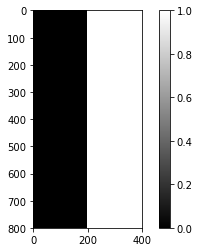

In [124]:
map_file = os.path.join(sim_dir, 'Geometry.map2D')

params, img = readGeoMap2d(map_file)
plt.imshow(img, cmap='gray')
plt.colorbar()

In [125]:
saveGeoMap2d(img, "sample.map2D")

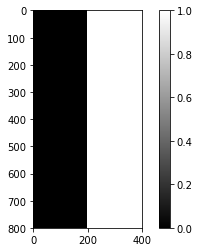

In [126]:
map_file = 'sample.map2D'
params, img = readGeoMap2d(map_file)
plt.imshow(img, cmap='gray')
plt.colorbar()

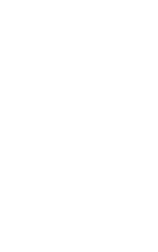

In [93]:
files = glob.glob(sim_dir+"*snp2D")
files.sort()

fig = plt.figure()
plt.axis('off')

ims = []
for i, f_path in enumerate(files):
    params, img = readSnp2d(f_path)
    im = plt.imshow(img)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
HTML(ani.to_html5_video())